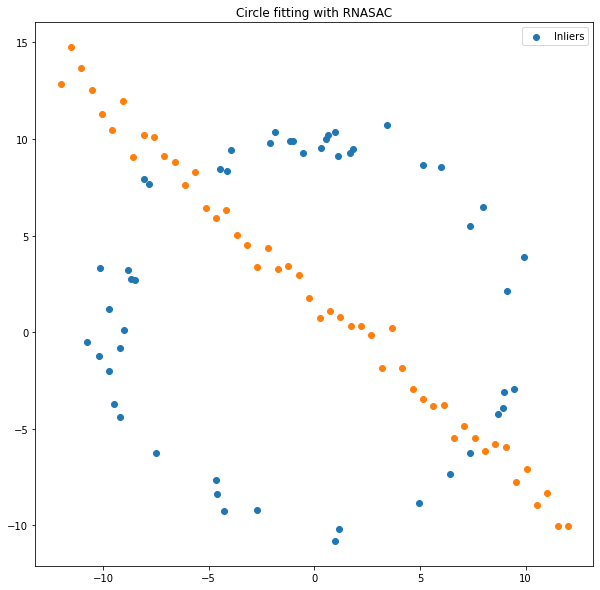

In [14]:
import numpy as np 
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
N=100
half_n=N//2
r=10
s=r/16
t=np.random.uniform(0,2*np.pi,half_n)
n=s*np.random.randn(half_n)
x,y=(r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
plt.figure(figsize=(10,10))
plt.scatter(x,y,label="Inliers")
m,b=-1,2
x=np.linspace(-12,12,half_n)
y=m*x+b+s*np.random.randn(half_n)
X_line=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X=np.vstack((X_circ,X_line))
plt.scatter(x,y)
plt.title('Circle fitting with RNASAC')
plt.legend(loc='upper right')
plt.show()

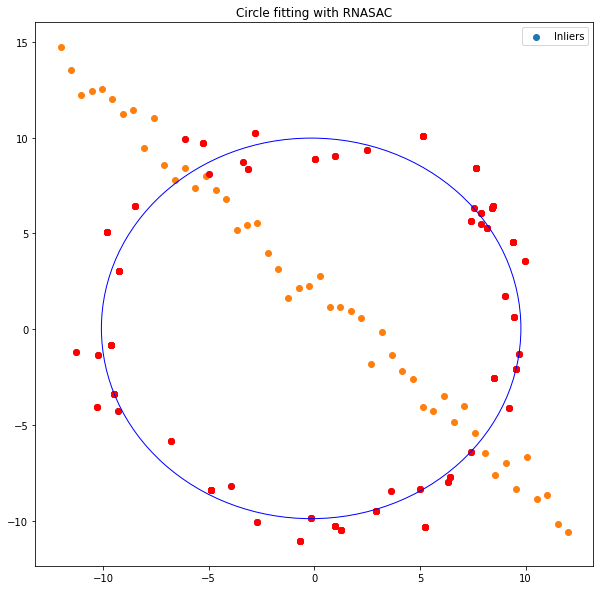

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

def data_generator():
    N=100
    half_n=N//2
    r=10
    s=r/16
    t=np.random.uniform(0,2*np.pi,half_n)
    n=s*np.random.randn(half_n)
    x,y=(r+n)*np.cos(t),(r+n)*np.sin(t)
    X_circ=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
    x_data = x
    y_data = y
    plt.figure(figsize=(10,10))
    plt.scatter(x,y,label="Inliers")
    m,b=-1,2
    x=np.linspace(-12,12,half_n)
    y=m*x+b+s*np.random.randn(half_n)
    X_line=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
    X=np.vstack((X_circ,X_line))
    plt.scatter(x,y)
    return x_data, y_data

def circle_func(a, b, r, x):
	return (np.sqrt(r**2-(x-a)**2) + b, -np.sqrt(r**2-(x-a)**2) + b)

class RANSAC:
	def __init__(self, x_data, y_data, n):
		self.x_data = x_data
		self.y_data = y_data
		self.n = n
		self.d_min = 99999
		self.best_model = None

	def random_sampling(self):
		sample = []
		save_ran = []
		count = 0

		# get three points from data
		while True:
			ran = np.random.randint(len(self.x_data))
            
			if ran not in save_ran:
				sample.append((self.x_data[ran], self.y_data[ran]))
				save_ran.append(ran)
				count += 1

				if count == 3:
					break

		return sample

	def make_model(self, sample):
		# calculate A, B, C value from three points by using matrix
	
		pt1 = sample[0]
		pt2 = sample[1]
		pt3 = sample[2]
		x1=[pt1[0],pt2[0],pt3[0]]
		y1=[pt1[1],pt2[1],pt3[1]]
		plt.scatter(x1, y1, c='r')
		A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
		B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
		inv_A = inv(A)

		c_x, c_y = np.dot(inv_A, B) / 2
		c_x, c_y = c_x[0], c_y[0]
		r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)

		return c_x, c_y, r

	def eval_model(self, model):
		d = 0
		c_x, c_y, r = model

		for i in range(len(self.x_data)):
			dis = np.sqrt((self.x_data[i]-c_x)**2 + (self.y_data[i]-c_y)**2)
            
            
            
            
            

			if dis >= r:
				d += dis - r
			else:
				d += r - dis
		
		return d

	def execute_ransac(self):
		# find best model
		for i in range(self.n):
			model = self.make_model(self.random_sampling())
			d_temp = self.eval_model(model)
			
			if self.d_min > d_temp:
				self.best_model = model
				self.d_min = d_temp


if __name__ == '__main__':
	# make data
	x_data, y_data = data_generator()

	# show data by scatter type
	#plt.scatter(x_data, y_data, c='blue', marker='o', label='data')

	# make ransac class
	# n: how many times try sampling
	ransac = RANSAC(x_data, y_data, 50)
	
	# execute ransac algorithm
	ransac.execute_ransac()
	
	# get best model from ransac
	a, b, r = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]

	# show result
	circle = plt.Circle((a, b), radius=r, color='b', fc='y', fill=False)
	plt.gca().add_patch(circle)
	plt.title('Circle fitting with RNASAC')
	plt.legend(loc='upper right')
	plt.show()

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
im1=cv.imread('001.jpg')
im1=cv.cvtColor(im1,cv.COLOR_BGR2RGB)
im2=cv.imread('flag.png')
im2=cv.cvtColor(im2,cv.COLOR_BGR2RGB)

im1cor=np.array([[144,205],[519,290],[523,518],[130,519]])
for i in range(0,4):
    cv.circle(im1,(im1cor[i][0],im1cor[i][1]),5,(255,0,0),-1)
im2cor=np.array([[0,0],[383,0],[383,192],[0,192]])
for i in range(0,4):
    cv.circle(im2,(im2cor[i][0],im2cor[i][1]),5,(255,0,0),-1)
    
P = cv.getPerspectiveTransform(im2cor,im1cor)   
perspective=cv.warpPerspective(im2,P,(400,200))
plt.imshow(perspective)
plt.subplots(figsize=(15, 8))
plt.subplot(121),plt.imshow(im1),plt.title("Image 1"),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im2),plt.title("Image 2"),plt.xticks([]), plt.yticks([])
plt.show()



error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\imgwarp.cpp:3392: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function 'cv::getPerspectiveTransform'


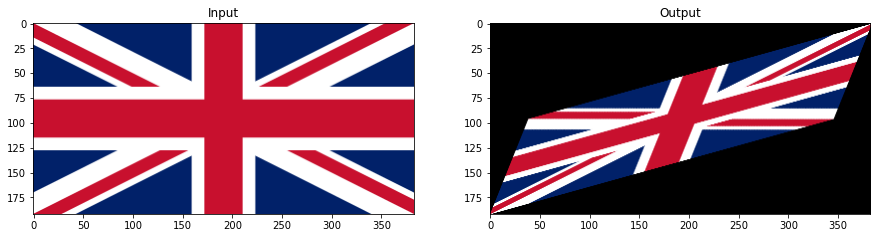

In [25]:
src = cv.imread('flag.png')
src = cv.cvtColor(src,cv.COLOR_BGR2RGB)
srcTri = np.array( [[0, 0], [src.shape[1] - 1, 0], [0, src.shape[0] - 1]] ).astype(np.float32)
#dstTri = np.array( [[0, src.shape[1]*0.33], [src.shape[1]*0.85, src.shape[0]*0.25], [src.shape[1]*0.15, src.shape[0]*0.7]] ).astype(np.float32)
dstTri = np.array( [[0, src.shape[1]*0.5], [src.shape[1]*0.9, src.shape[0]*0.5], [src.shape[1]*0.1, src.shape[0]*0.5]] ).astype(np.float32)
warp_mat = cv.getAffineTransform(srcTri, dstTri)
warp_dst = cv.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]))
plt.subplots(figsize=(15, 8))
plt.subplot(121),plt.imshow(src),plt.title('Input')#,plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(warp_dst),plt.title('Output')#,plt.xticks([]), plt.yticks([])
plt.show()

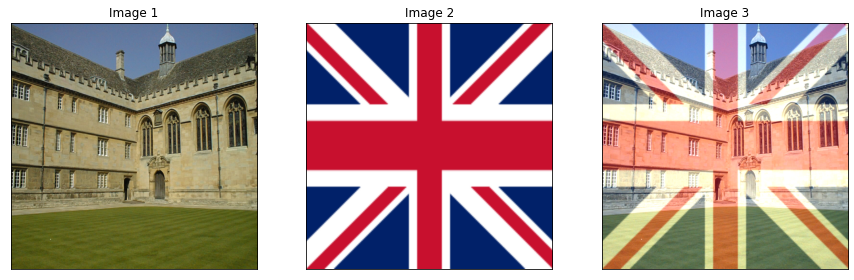

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
im1=cv.imread('001.jpg')
im1=cv.resize(im1,(512,512))
im1=cv.cvtColor(im1,cv.COLOR_BGR2RGB)
im2=cv.imread('flag.png')
im2=cv.resize(im2,(512,512))
im2=cv.cvtColor(im2,cv.COLOR_BGR2RGB)
#im3=cv.add(im1,im2)
im3=cv.addWeighted(im1,1,im2,0.5,0)
plt.subplots(figsize=(15, 8))
plt.subplot(131),plt.imshow(im1),plt.title("Image 1"),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(im2),plt.title("Image 2"),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(im3),plt.title("Image 3"),plt.xticks([]), plt.yticks([])
plt.show() 

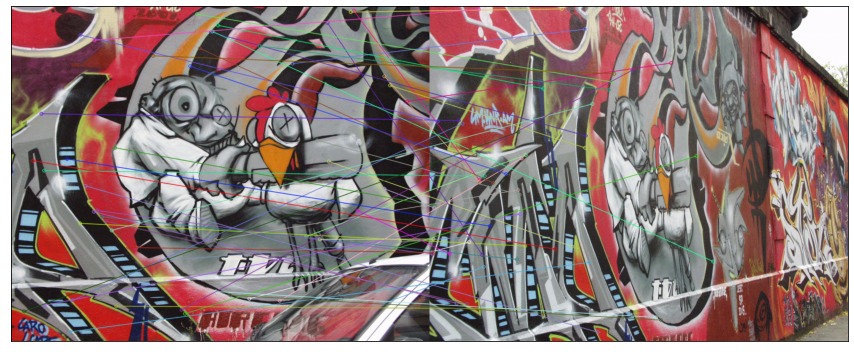

In [47]:
#Q3
import cv2
import matplotlib.pyplot as plt
img1=cv2.imread('img1.ppm')
img2=cv2.imread('img5.ppm')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(15,15))
plt.imshow(img3)
plt.xticks([]), plt.yticks([])
plt.show()


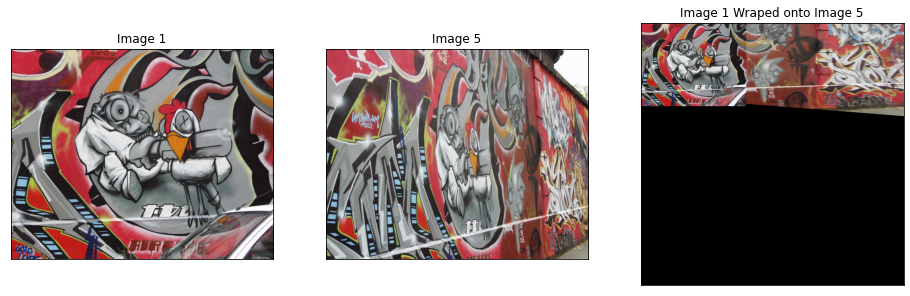

In [51]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im1 = cv.imread('img1.ppm',cv.IMREAD_ANYCOLOR)
im1 = cv.cvtColor(im1,cv.COLOR_BGR2RGB)
im5 = cv.imread('img5.ppm',cv.IMREAD_ANYCOLOR)
im5 = cv.cvtColor(im5,cv.COLOR_BGR2RGB)
H = []
with open(r'H1to5p') as f:
 H = np.array([[float(h) for h in line.split()] for line in f])
 
im1to5 = cv.warpPerspective(im5,np.linalg.inv(H),(2000,2000)) 
#im1to5[0:im1.shape[0],0:im1.shape[1]] = im1
fig, axes = plt.subplots(1,3, figsize=(16,16))
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1')
axes[1].imshow(im5,cmap='gray')
axes[1].set_title('Image 5')
axes[2].imshow(im1to5,cmap='gray')
axes[2].set_title('Image 1 Wraped onto Image 5')
for i in range(3):
    axes[i].set_xticks([]), axes[i].set_yticks([])
plt.show()


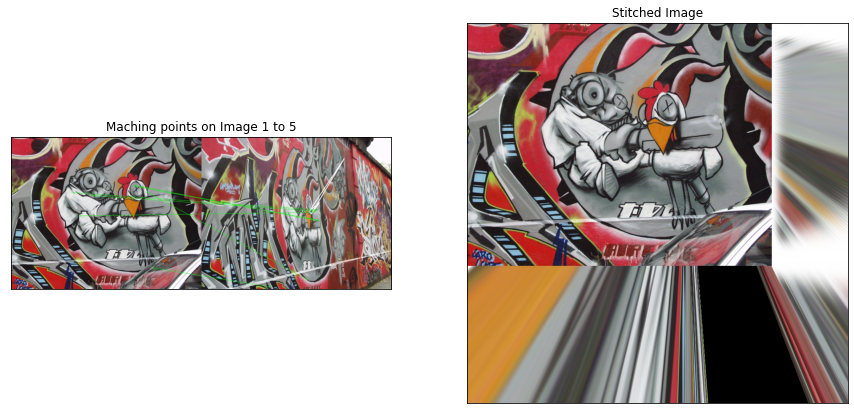

In [77]:
import numpy as np
import cv2

img1 = cv2.imread('img1.ppm',cv2.IMREAD_ANYCOLOR)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('img5.ppm',cv2.IMREAD_ANYCOLOR)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
sift = cv2.SIFT_create()
keyPoints1, descriptors1 = sift.detectAndCompute(img1, None)
keyPoints2, descriptors2 = sift.detectAndCompute(img2, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Select the good matches using the ratio test
goodMatches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        goodMatches.append(m)
        
# Apply the homography transformation if we have enough good matches
MIN_MATCH_COUNT = 10
if len(goodMatches) > MIN_MATCH_COUNT:
    # Get the good key points positions
    sourcePoints = np.float32([keyPoints1[m.queryIdx].pt for m in goodMatches]).reshape(-1, 1, 2)
    destinationPoints = np.float32([keyPoints2[m.trainIdx].pt for m in goodMatches]).reshape(-1, 1, 2)
    # obtain the homography matrix
    M, mask = cv2.findHomography(sourcePoints, destinationPoints, method=cv2.RANSAC, ransacReprojThreshold=5.0)
    matchesMask = mask.ravel().tolist()
    # Apply the perspective transformation to the source image corners
    h = img1.shape[0]
    w = img1.shape[1]
    corners = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    transformedCorners = cv2.perspectiveTransform(corners, M)
    # Draw a polygon on the second image joining the transformed corners
    img2 = cv2.polylines(img2, [np.int32(transformedCorners)], True, (255, 255, 255), 2, cv2.LINE_AA)
else:
  
    matchesMask = None

drawParameters = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matchesMask, flags=2)
result = cv2.drawMatches(img1, keyPoints1, img2, keyPoints2, goodMatches, None, **drawParameters)
im_warped = cv2.warpPerspective(img2, np.linalg.inv(M), (1000,1000))
im_warped[0:img1.shape[0], 0:img1.shape[1]] = img1
plt.subplots(figsize=(15, 12))
plt.subplot(121),plt.imshow(result),plt.title("Maching points on Image 1 to 5"),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im_warped),plt.title("Stitched Image"),plt.xticks([]), plt.yticks([])
plt.show()

In [61]:
import numpy as np
import cv2
# Load the images in gray scale
img1 = cv2.imread('img1.ppm',cv2.IMREAD_ANYCOLOR)
#img1 = cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('img5.ppm',cv2.IMREAD_ANYCOLOR)
#img2 = cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)
# Detect the SIFT key points and compute the descriptors for the two images
sift = cv2.SIFT_create()
keyPoints1, descriptors1 = sift.detectAndCompute(img1, None)
keyPoints2, descriptors2 = sift.detectAndCompute(img2, None)
# Create brute-force matcher object
bf = cv2.BFMatcher()
# Match the descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)
# Select the good matches using the ratio test
goodMatches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        goodMatches.append(m)
# Apply the homography transformation if we have enough good matches
MIN_MATCH_COUNT = 10
if len(goodMatches) > MIN_MATCH_COUNT:
    # Get the good key points positions
    sourcePoints = np.float32([keyPoints1[m.queryIdx].pt for m in goodMatches]).reshape(-1, 1, 2)
    destinationPoints = np.float32([keyPoints2[m.trainIdx].pt for m in goodMatches]).reshape(-1, 1, 2)
    # obtain the homography matrix
    M, mask = cv2.findHomography(sourcePoints, destinationPoints, method=cv2.RANSAC, ransacReprojThreshold=5.0)
    matchesMask = mask.ravel().tolist()
    # Apply the perspective transformation to the source image corners
    h = img1.shape[0]
    w = img1.shape[1]
    corners = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    transformedCorners = cv2.perspectiveTransform(corners, M)
    # Draw a polygon on the second image joining the transformed corners
    img2 = cv2.polylines(img2, [np.int32(transformedCorners)], True, (255, 255, 255), 2, cv2.LINE_AA)
else:
    #print("Not enough matches are found - %d/%d" % (len(goodMatches), MIN_MATCH_COUNT))
    matchesMask = None
# Draw the matches 
drawParameters = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matchesMask, flags=2)
result = cv2.drawMatches(img1, keyPoints1, img2, keyPoints2, goodMatches, None, **drawParameters)
# Display the results
cv2.imshow('Homography', result)
#print(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

im4_warped = cv2.warpPerspective(img2, np.linalg.pinv(M), (1000,1000))
im4_warped[0:img1.shape[0], 0:img1.shape[1]] = img1
cv2.namedWindow("Image 4 Warped", cv2.WINDOW_AUTOSIZE)
cv2.imshow("Image 4 Warped", im4_warped)
cv2.waitKey(0)
cv2.destroyAllWindows()

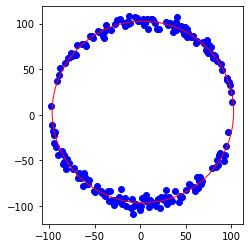

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

def data_generator():
	x_data = []
	y_data = []

	a = 2
	b = 3
	r = 100

	for i in np.arange(a - r, a + r, 1):
		x = i
		y = 0
		y1, y2 = circle_func(a, b, r, x)
		if np.random.randn() > 0:
			y += y1 + np.random.randn()*5
		else:
			y += y2 + np.random.randn()*5
		x_data.append(x)
		y_data.append(y)

	return x_data, y_data

def circle_func(a, b, r, x):
	return (np.sqrt(r**2-(x-a)**2) + b, -np.sqrt(r**2-(x-a)**2) + b)

class RANSAC:
	def __init__(self, x_data, y_data, n):
		self.x_data = x_data
		self.y_data = y_data
		self.n = n
		self.d_min = 99999
		self.best_model = None

	def random_sampling(self):
		sample = []
		save_ran = []
		count = 0

		# get three points from data
		while True:
			ran = np.random.randint(len(self.x_data))

			if ran not in save_ran:
				sample.append((self.x_data[ran], self.y_data[ran]))
				save_ran.append(ran)
				count += 1

				if count == 3:
					break

		return sample

	def make_model(self, sample):
		# calculate A, B, C value from three points by using matrix
	
		pt1 = sample[0]
		pt2 = sample[1]
		pt3 = sample[2]

		A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
		B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
		inv_A = inv(A)

		c_x, c_y = np.dot(inv_A, B) / 2
		c_x, c_y = c_x[0], c_y[0]
		r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)

		return c_x, c_y, r

	def eval_model(self, model):
		d = 0
		c_x, c_y, r = model

		for i in range(len(self.x_data)):
			dis = np.sqrt((self.x_data[i]-c_x)**2 + (self.y_data[i]-c_y)**2)

			if dis >= r:
				d += dis - r
			else:
				d += r - dis
		
		return d

	def execute_ransac(self):
		# find best model
		for i in range(self.n):
			model = self.make_model(self.random_sampling())
			d_temp = self.eval_model(model)
			
			if self.d_min > d_temp:
				self.best_model = model
				self.d_min = d_temp


if __name__ == '__main__':
	# make data
	x_data, y_data = data_generator()

	# show data by scatter type
	plt.scatter(x_data, y_data, c='blue', marker='o', label='data')

	# make ransac class
	# n: how many times try sampling
	ransac = RANSAC(x_data, y_data, 50)
	
	# execute ransac algorithm
	ransac.execute_ransac()
	
	# get best model from ransac
	a, b, r = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]

	# show result
	circle = plt.Circle((a, b), radius=r, color='r', fc='y', fill=False)
	plt.gca().add_patch(circle)

	plt.axis('scaled')

	# plt.tight_layout()
	plt.show()

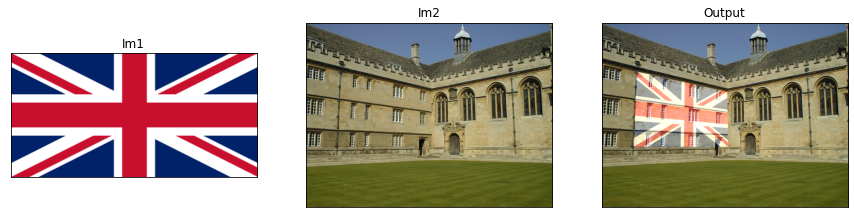

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__' :

    # Read source image.
    im_src = cv2.imread('flag.png')
    im_src = cv2.cvtColor(im_src,cv2.COLOR_BGR2RGB)
    # Four corners of the book in source image
    pts_src = np.array([[0,0],[383,0],[383,192],[0,192]])

    # Read destination image.
    im_dst = cv2.imread('001.jpg')
    im_dst = cv2.cvtColor(im_dst,cv2.COLOR_BGR2RGB)
    # Four corners of the book in destination image.
    pts_dst = np.array([[144,205],[519,290],[523,518],[130,519]])

    # Calculate Homography
    h, status = cv2.findHomography(pts_src, pts_dst)

    # Warp source image to destination based on homography
    im_out = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
    im3=cv.addWeighted(im_dst,1,im_out,0.5,0)
    # Display images
plt.subplots(figsize=(15, 8))
plt.subplot(131),plt.imshow(im_src),plt.title('Im1'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(im_dst),plt.title('Im2'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(im3),plt.title('Output'),plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import cv2
import numpy as np

# Defining variables to store coordinates where the second image has to be placed
positions=[] 
positions2=[]
count=0

# Mouse callback function
def draw_circle(event,x,y,flags,param):
    global positions,count
    # If event is Left Button Click then store the coordinate in the lists, positions and positions2
    if event == cv2.EVENT_LBUTTONUP:
        cv2.circle(building,(x,y),2,(255,0,0),-1)
        positions.append([x,y])
        if(count!=3):
            positions2.append([x,y])
        elif(count==3):
            positions2.insert(2,[x,y])
        count+=1
        
# Reading the two images and storing it in variables img and dp
building = cv2.imread('001.jpg')
dp = cv2.imread('flag.png')

# Defing a window named 'image'
cv2.namedWindow('image')

cv2.setMouseCallback('image',draw_circle)

while(True):
    #cv2.imshow('image',building)
    k = cv2.waitKey(20) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

height, width = building.shape[:2]
h1,w1 = dp.shape[:2]

pts1=np.float32([[0,0],[w1,0],[0,h1],[w1,h1]])
pts2=np.float32(positions)


h, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC,5.0)

height, width, channels = building.shape
im1Reg = cv2.warpPerspective(dp, h, (width, height))

mask2 = np.zeros(building.shape, dtype=np.uint8)

roi_corners2 = np.int32(positions2)

channel_count2 = building.shape[2]  
ignore_mask_color2 = (255,)*channel_count2

cv2.fillConvexPoly(mask2, roi_corners2, ignore_mask_color2)

mask2 = cv2.bitwise_not(mask2)
masked_image2 = cv2.bitwise_and(building, mask2)

#Using Bitwise or to merge the two images
final = cv2.bitwise_or(im1Reg, masked_image2)
cv2.imshow('final.png',final)